## <font color=green> *FACTS GMD:* <font color=black> Figure 4 </font>
#### <font color=blue> *Variance decomposition of GMSL change in 2100 under SSP1-2.6 (left column) and SSP5-8.5 (right column), under Workflows 1f, 2f, 3f and 4.* </font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import netCDF4 as nc
from pandas.plotting import table 
import xarray as xr
from datetime import date
import os
#
import warnings
import matplotlib
warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning)
#
colrs = 'rcgmbyrkcbgm'

### <font color=blue> List of **Modules** and **Data** to be used </font>

In [2]:
# Load module nc data.
#
df_module = pd.read_fwf('001_input_Names_Modules_dataFILES/Fig4_IP_module_submodule_DataFILE.txt',comment = '#')
df_module

,Component,Module,sub_Module,DataFile
0,AIS,ipccar5,icesheets,ar5AIS.ipccar5.icesheets_AIS_globalsl.nc
1,AIS,larmip,AIS,larmip.larmip.AIS_globalsl.nc
2,AIS,deconto21,AIS,deconto21.deconto21.AIS_AIS_globalsl.nc
3,AIS,bamber19,icesheets,bamber19.bamber19.icesheets_AIS_globalsl.nc
4,GrIS,FittedISMIP,GrIS,GrIS1f.FittedISMIP.GrIS_GIS_globalsl.nc
5,GrIS,bamber19,icesheets,bamber19.bamber19.icesheets_GIS_globalsl.nc
6,Glaciers,ipccar5,glaciers,ar5glaciers.ipccar5.glaciers_globalsl.nc
7,LWS,ssp,landwaterstorage,lws.ssp.landwaterstorage_globalsl.nc
8,TE,tlm,sterodynamics,ocean.tlm.sterodynamics_globalsl.nc


## <font color=green> **Compute** and **Plot** <font color=black>*Fraction of variance*  </font>

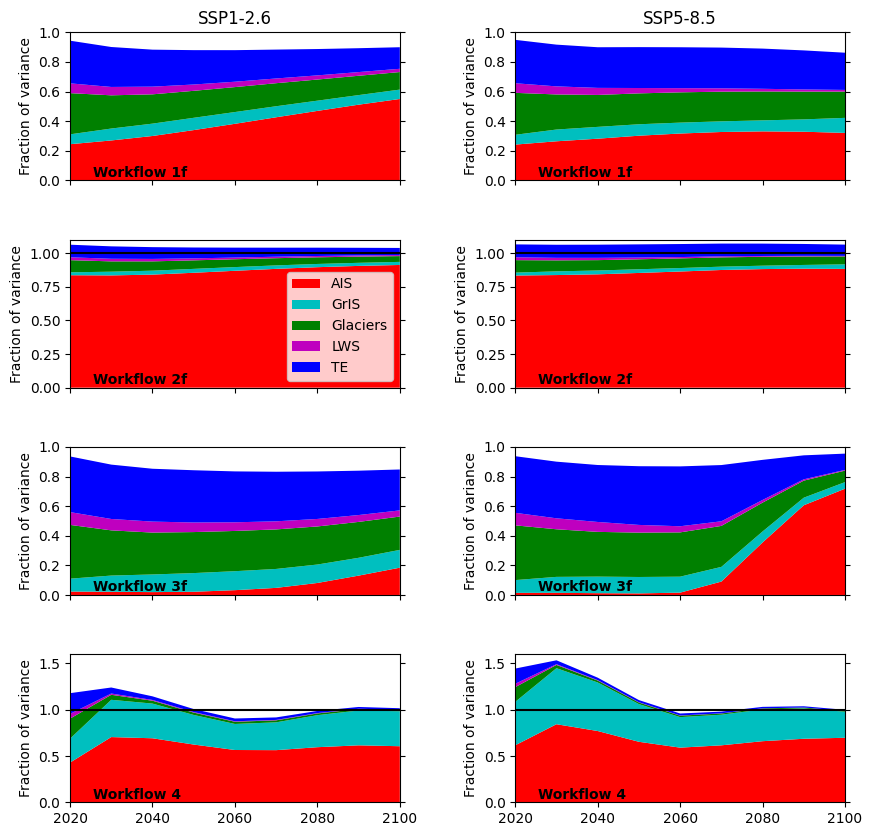

In [3]:
import fig_varDecomp as IP
#
EXPDATE  = 221217
wf1f = ['AIS-ipccar5'   , 'GrIS-FittedISMIP' ,  'Glaciers-ipccar5-GMIP2'  ,  'LWS-ssp' , 'TE-tlm']
wf2f = ['AIS-larmip'    , 'GrIS-FittedISMIP' ,  'Glaciers-ipccar5-GMIP2'  ,  'LWS-ssp' , 'TE-tlm']
wf3f = ['AIS-deconto21' , 'GrIS-FittedISMIP' ,  'Glaciers-ipccar5-GMIP2'  ,  'LWS-ssp' , 'TE-tlm']
wf4  = ['AIS-bamber19'  , 'GrIS-bamber19'    ,  'Glaciers-ipccar5-GMIP2'  ,  'LWS-ssp' , 'TE-tlm']
#
workflow = ['wf1f', 'wf2f', 'wf3f','wf4']
ssp      = ['ssp126','ssp585'] 
#
# ---------  
#
df = df_module
#
plt.subplots(figsize=(10, 10));
# Subplot will alternate between ssp
subPLT = 0
#
for wf in enumerate(workflow):
    for ss in enumerate(ssp):
        #
        # Import the .nc data for each workflow's component/modules
        [sampsloccomponents, components, yrs] = IP.module_varFig_nc(df,eval(f'{wf[1]}'),[ss[1]],EXPDATE)
        # Compute the Fraction of variance.
        [varV, varF] = IP.varV_varF(sampsloccomponents,components)
        #
        # Plot Fraction of variance of workflow in subplot for 2 SSP.
        subPLT += 1
        ax = plt.subplot(4, 2, subPLT); ax.stackplot(yrs,varF[0],varF[1], varF[2], varF[3], varF[4], labels=components, colors=colrs);
        #
        # Set same Y-axis limits across each workflow.
        if wf[1] == 'wf1f' and ss[1] == 'ssp126':  ax.set_ylim([0, 1]);  ax.set_title('SSP1-2.6'); 
        if wf[1] == 'wf1f' and ss[1] == 'ssp585':  ax.set_ylim([0, 1]);  ax.set_title('SSP5-8.5');
        #
        if wf[1] == 'wf2f' and ss[1] == 'ssp126':  ax.set_ylim([0, 1.1]); ax.axhline(y=1,color='black'); ax.legend(loc='lower right'); 
        if wf[1] == 'wf2f' and ss[1] == 'ssp585':  ax.set_ylim([0, 1.1]); ax.axhline(y=1,color='black')
        #
        if wf[1] == 'wf3f' and ss[1] == 'ssp126':  ax.set_ylim([0, 1]);
        if wf[1] == 'wf3f' and ss[1] == 'ssp585':  ax.set_ylim([0, 1]);
        #
        if wf[1] == 'wf4'  and ss[1] == 'ssp126':  ax.set_ylim([0, 1.6]); ax.axhline(y=1,color='black')
        if wf[1] == 'wf4'  and ss[1] == 'ssp585':  ax.set_ylim([0, 1.6]); ax.axhline(y=1,color='black')
        #
        if wf[1] != 'wf4': ax.set_xlabel(''); ax.xaxis.set_ticklabels([])
        #
        #
        ax.set_xlim([2020, 2100]); 
        ax.set_ylabel('Fraction of variance');
        ax.text(.07, .1, 'Workflow '+wf[1][2:], horizontalalignment='left',verticalalignment='top',weight='bold',fontsize=10,transform=ax.transAxes)
        ax.tick_params(axis='both', labelsize=10); ax.yaxis.set_ticks_position('both')
        #
plt.subplots_adjust(wspace=0.35, hspace=0.4)
#
# Get todays date.
today = date.today().strftime('%Y-%m-%d')
# Save Figure.
figureNAME = "Fig4_VarDecomp_global"+today+".pdf"
if os.path.exists(figureNAME): os.remove(figureNAME)
plt.savefig(figureNAME, format="pdf", bbox_inches="tight")
# 
plt.show()